## Anomaly Event Detection with Sliding window

### 1. Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

ModuleNotFoundError: No module named 'prettytable'

### 2. Load Data

In [ ]:
df = pd.read_csv('AG_NO3_fill_cells_remove_NAN.csv',index_col=['Date'])

### 3. Basic Info of the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30790 entries, 8/2/2016 12:29 to nan
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NO3N          15808 non-null  float64
 1   Student_Flag  15808 non-null  float64
dtypes: float64(2)
memory usage: 721.6+ KB


In [ ]:
print(df.shape)
df.head(5)

(30790, 2)


,NO3N,Student_Flag
Date,,
8/2/2016 12:29,0.071,0.0
8/2/2016 12:59,0.030,0.0
8/2/2016 13:29,0.030,0.0
8/2/2016 13:59,0.030,0.0
8/2/2016 14:29,0.030,0.0


In [ ]:
 df.tail(5)

,NO3N,Student_Flag
Date,,
NaN,NaN,NaN
NaN,NaN,NaN
NaN,NaN,NaN
NaN,NaN,NaN
NaN,NaN,NaN


### 4. Data Wrangling, Feature Engineering and EDA

In [ ]:
# Lot of Null rows at the end of the file so dropping them
df = df.dropna() 
df.shape

(15808, 2)

<AxesSubplot:xlabel='Date'>

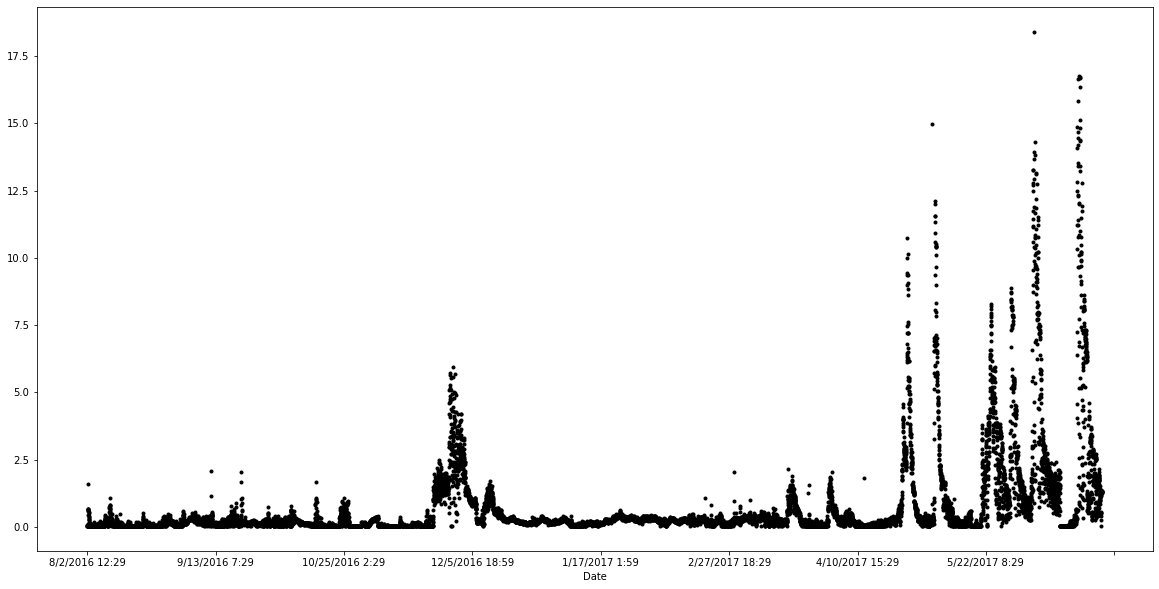

In [ ]:
#Scatter Plot of the Nitrates data
column = df['NO3N']
column.plot(style='k.',figsize=(20,10))       

### Figure 1 - Time Series Scatter Plot of the Nitrates data

In [ ]:
#Create New DF for Anomalies
df_student = df.copy()
df_student.loc[df.Student_Flag==0,"NO3N"]=0
df_student['NO3N'] = df_student['NO3N'].replace({0:np.nan})
df_student.head(5)

,NO3N,Student_Flag
Date,,
8/2/2016 12:29,NaN,0.0
8/2/2016 12:59,NaN,0.0
8/2/2016 13:29,NaN,0.0
8/2/2016 13:59,NaN,0.0
8/2/2016 14:29,NaN,0.0


In [ ]:
#Get Normal & Anomaly Counts
anomaly_data_cnt = df.loc[(df['Student_Flag']==1)].shape[0]
nomal_data_count = df.loc[(df['Student_Flag']==0)].shape[0]

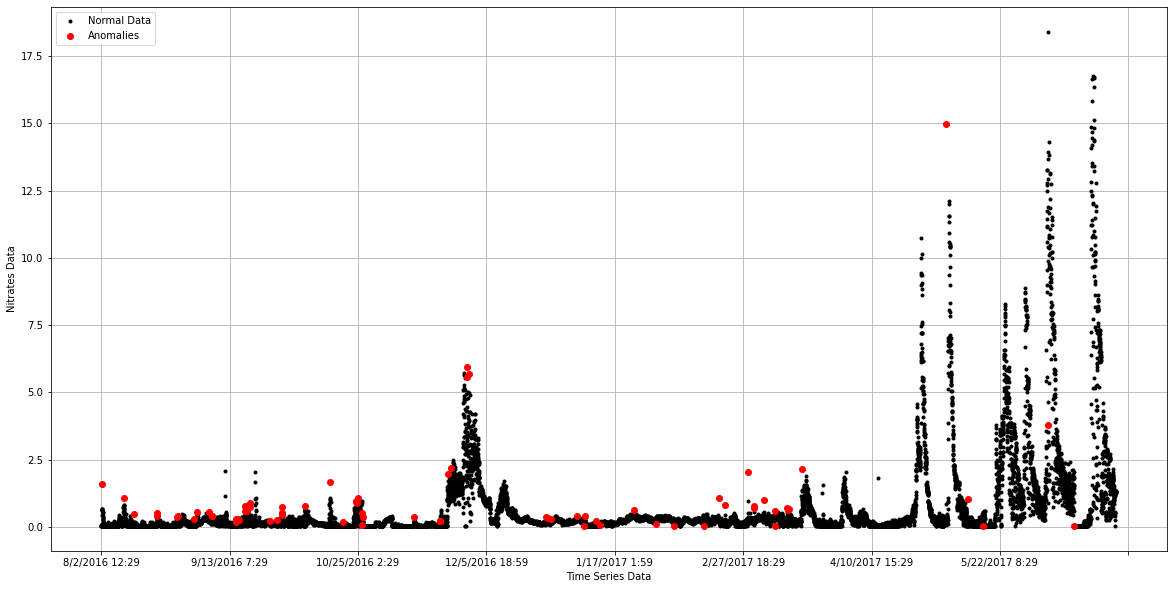

In [ ]:
plt.figure(figsize=(20,10))

column = df['NO3N']
column_student = df_student['NO3N']
ax1 = column.plot(style='k.',grid=True,label='Normal Data')  
ax2 = column_student.plot(style='ro',grid=True,label='Anomalies')  
plt.xlabel('Time Series Data')
plt.ylabel('Nitrates Data')
plt.legend(loc='upper left')
plt.show()

### Figure 2- Plot Overlap of Anomalies and Normal Nitrate data

In [ ]:
N = len(column)
time = np.arange(0,N)
(len(df),len(time))
t = PrettyTable(['Window Size', 'Percentile', 'Total Anomaly','Accurate Anomaly','Normal Accuracy %','Anomaly Accuracy %'])

In [ ]:
#Convert the Output in a Numpy Array
column = column.to_numpy()

In [ ]:
#parameters 
#Looping for window size between 500 & 2000 points
percentile =[75,80,85,90]
t.clear_rows()
for k in range(250,2000, 50):    
    for percent in percentile:        
        get_bands = lambda df : np.percentile(df,percent)
        upper = [get_bands(column[range(0 if i - k < 0 else i-k ,i + k if i + k < N else N)]) for i in range(0,N)]        
        
        # compute local outliers         
        df['anomalies'] = (column > upper)*1
        total_anomaly_data_cnt = df.loc[(df['anomalies']==1)].shape[0]
        calculated_anomaly_data_cnt = df.loc[(df['anomalies']==1) & (df['Student_Flag']==1)].shape[0]
        calculated_normal_data_cnt = df.loc[(df['anomalies']==0) & (df['Student_Flag']==0)].shape[0]
        Normal_accuracy_rate = round(calculated_normal_data_cnt/nomal_data_count*100,2)
        Anomaly_accuracy_rate = round(calculated_anomaly_data_cnt/anomaly_data_cnt*100,2)
        if Anomaly_accuracy_rate > 75.00 and Normal_accuracy_rate  > 80.00:
            t.add_row([k,  percent,total_anomaly_data_cnt,calculated_anomaly_data_cnt,Normal_accuracy_rate,Anomaly_accuracy_rate ])                   

In [ ]:
t.sortby = "Anomaly Accuracy %"
t.reversesort = True
print(t)  

+-------------+------------+---------------+------------------+-------------------+--------------------+
| Window Size | Percentile | Total Anomaly | Accurate Anomaly | Normal Accuracy % | Anomaly Accuracy % |
+-------------+------------+---------------+------------------+-------------------+--------------------+
|     450     |     80     |      2993     |        62        |       81.37       |       80.52        |
|     400     |     80     |      2932     |        62        |       81.76       |       80.52        |
|     350     |     80     |      2896     |        59        |       81.97       |       76.62        |
|     750     |     80     |      3080     |        58        |       80.79       |       75.32        |
|     650     |     80     |      3084     |        58        |       80.76       |       75.32        |
|     500     |     80     |      3028     |        58        |       81.12       |       75.32        |
|     300     |     80     |      2873     |        58 

In [ ]:
#Input Best Values from the above table
k = 400
N = len(column)
#get_bands = lambda df : (np.mean(df) + np.percentile(df,80))
get_bands = lambda df :  np.percentile(df,80)
bands = [get_bands(column[range(0 if i - k < 0 else i-k ,i + k if i + k < N else N)]) for i in range(0,N)]
upper = bands
len(upper)
# compute local outliers 
#anomaly_count = (column > upper)
df['Anomalies'] = (column > upper)*1
total_anomaly_data_cnt = df.loc[(df['Anomalies']==1)].shape[0]
calculated_anomaly_data_cnt = df.loc[(df['Anomalies']==1) & (df['Student_Flag']==1)].shape[0]
calculated_normal_data_cnt = df.loc[(df['Anomalies']==0) & (df['Student_Flag']==0)].shape[0]
Normal_accuracy_rate = round(calculated_normal_data_cnt/nomal_data_count*100,2)
Anomaly_accuracy_rate = round(calculated_anomaly_data_cnt/anomaly_data_cnt*100,2)

print(Normal_accuracy_rate, Anomaly_accuracy_rate)

81.76 80.52


In [ ]:
mask1 = ((df['Anomalies']==1) & (df['Student_Flag']==1))
df.loc[~mask1, 'Accurate_Anomaly'] = 0
df.loc[mask1, 'Accurate_Anomaly'] = 1
df.head(5)

,NO3N,Student_Flag,anomalies,Anomalies,Accurate_Anomaly
Date,,,,,
8/2/2016 12:29,0.071,0.0,0,0,0.0
8/2/2016 12:59,0.030,0.0,0,0,0.0
8/2/2016 13:29,0.030,0.0,0,0,0.0
8/2/2016 13:59,0.030,0.0,0,0,0.0
8/2/2016 14:29,0.030,0.0,0,0,0.0


In [ ]:
#Create New DF for Accurate Anomalies
df_Accurate_Anomaly = df.copy()
df_Accurate_Anomaly.loc[df.Accurate_Anomaly==0,"NO3N"]=0
df_Accurate_Anomaly['NO3N'] = df_Accurate_Anomaly['NO3N'].replace({0:np.nan})
df_Accurate_Anomaly.head(5)
#print(df_Accurate_Anomaly.loc[(df_Accurate_Anomaly['Accurate_Anomaly']==1)].shape[0])

,NO3N,Student_Flag,anomalies,Anomalies,Accurate_Anomaly
Date,,,,,
8/2/2016 12:29,NaN,0.0,0,0,0.0
8/2/2016 12:59,NaN,0.0,0,0,0.0
8/2/2016 13:29,NaN,0.0,0,0,0.0
8/2/2016 13:59,NaN,0.0,0,0,0.0
8/2/2016 14:29,NaN,0.0,0,0,0.0


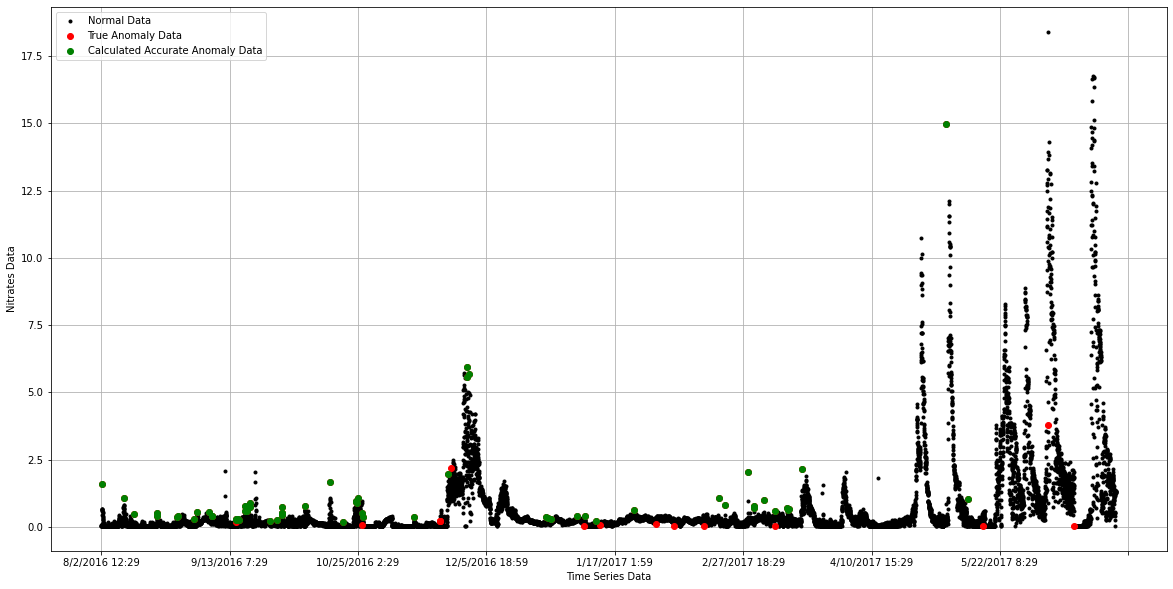

In [ ]:
#Plot Overlap of Anomalies and Normal Nitrate data
plt.figure(figsize=(20,10))

column = df['NO3N']
column_student = df_student['NO3N']
accurate_anomaly = df_Accurate_Anomaly['NO3N']
ax1 = column.plot(style='k.',grid=True,label='Normal Data')  
ax2 = column_student.plot(style='ro',grid=True,label='True Anomaly Data')  
ax3 = accurate_anomaly.plot(style='go',grid=True,label='Calculated Accurate Anomaly Data')  
plt.xlabel('Time Series Data')
plt.ylabel('Nitrates Data')
plt.legend(loc='upper left')
plt.show()

### Figure 3 - Plot Overlap of Anomalies and Normal Nitrate data